In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from PIL import Image

In [47]:


re = pd.read_csv(r'F:\Code\coupling\python\file\gene\enrich_result\Project_wg_result1680578320\enrichment_results_wg_result1680578320.txt',delimiter='\t')

fdrP = re['FDR'].values

a = -np.log10(fdrP)
a[0] = 4
re.insert(loc=0,column='log10P',value=a)

print(re["description"])

0                 NADH dehydrogenase complex assembly
1    mitochondrial respiratory chain complex assembly
2                       mitochondrial gene expression
3      generation of precursor metabolites and energy
4           nucleoside triphosphate metabolic process
5          nucleoside monophosphate metabolic process
Name: description, dtype: object


C:\Users\SUN\AppData\Local\Temp\ipykernel_30432\1990675946.py:5: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(fdrP)


In [3]:
def get_color():
    a=1


img = Image.open(r'D:\User\Desktop\SDI 耦合结果\meatspace_NC-AD-FA-246\colormap.png')
#a = img[25,25,:]
out = img.convert("RGB")
out1 = np.array(out)
print(out1.shape)
color = []
colorNum = np.zeros([20,3])

out2 = plt.imread(r'D:\User\Desktop\SDI 耦合结果\meatspace_NC-AD-FA-246\colormap.png')

for i in range(20):

    a = out1[int((0.5+i)/20 *1200),25,:]
    str1 = '#' + hex(a[0])[2:] +hex(a[1])[2:] + hex(a[2])[2:]
    color.append(str1)
    colorNum[19-i,:] = out2[int((0.5+i)/20 *1232),25,0:3]


color
colorNum





    



(1232, 60, 3)


array([[0.80000001, 0.92156863, 0.77254903],
       [0.73725492, 0.50196081, 0.74117649],
       [0.8509804 , 0.8509804 , 0.8509804 ],
       [0.98823529, 0.80392158, 0.89803922],
       [0.7019608 , 0.87058824, 0.41176471],
       [0.99215686, 0.70588237, 0.38431373],
       [0.50196081, 0.69411767, 0.82745099],
       [0.98431373, 0.50196081, 0.44705883],
       [0.74509805, 0.72941178, 0.85490197],
       [1.        , 1.        , 0.7019608 ],
       [0.5529412 , 0.82745099, 0.78039217],
       [0.60000002, 0.60000002, 0.60000002],
       [0.96862745, 0.50588238, 0.74901962],
       [0.65098041, 0.33725491, 0.15686275],
       [1.        , 1.        , 0.2       ],
       [1.        , 0.49803922, 0.        ],
       [0.59607846, 0.30588236, 0.63921571],
       [0.3019608 , 0.68627453, 0.29019609],
       [0.21568628, 0.49411765, 0.72156864],
       [0.89411765, 0.10196079, 0.10980392]])

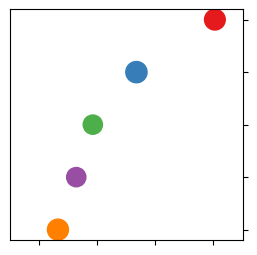

In [6]:


re_metascape = pd.read_csv(r'D:\User\Desktop\R2SN-SC-coupling\NC_AD-R2SN-FN-500\result.csv')
#re_metascape = pd.read_csv(r'D:\User\Desktop\meatspace_NC-AD-FA-246\result-main1.csv')



re_metascape['Log10(q)'] = -re_metascape['Log10(q)']
re_metascape.sort_values(by='Log10(q)',inplace=True)



plotIndex = (re_metascape['plot'].values >0)


colorNum1 = colorNum[plotIndex]
re_metascape = re_metascape[re_metascape['plot' ] >0]



#Log10(q), 
fig, ax = plt.subplots(figsize=(3, 3))

tips = sns.load_dataset("tips",data_home='F:\Data Users\seaborn-data-master')\
#,size=re['size'].values




plt.scatter(x = re_metascape['Log10(q)'].values,y= re_metascape["Description"].values,
            s=re_metascape['Count'].values *6,c= colorNum1)
#sns.scatterplot(data=re_metascape, x="Log10(q)", y="Description",size='Count')
plt.xlim([5,13])
# plt.ylim([-0.1,1.1])

x_major_locator = MultipleLocator(2)
# 把x轴的刻度间隔设置为1，并存在变量里

ax.xaxis.set_major_locator(x_major_locator)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.tick_params(right=True,left=False)
plt.xlabel("")
plt.ylabel("")
plt.savefig(r'F:\Code\coupling\python\file\gene\fig\out3.png')

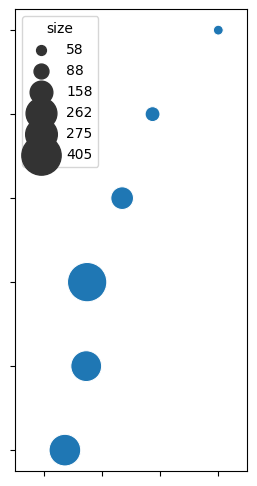

In [54]:
fig, ax = plt.subplots(figsize=(3, 6))

tips = sns.load_dataset("tips",data_home='F:\Data Users\seaborn-data-master')\
#,size=re['size'].values
sns.scatterplot(data=re, x="log10P", y="description",size='size',sizes=(50,800))
plt.xlim([0.5,4.5])
# plt.ylim([-0.1,1.1])

x_major_locator = MultipleLocator(1)
# 把x轴的刻度间隔设置为1，并存在变量里

ax.xaxis.set_major_locator(x_major_locator)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.xlabel("")
plt.ylabel("")
plt.savefig(r'F:\Code\coupling\python\file\gene\fig\out1.png')




In [29]:

re_metascape = pd.read_csv(r'F:\Code\coupling\python\file\gene\enrich_result\meatspace_NC-AD-FA-246-1267\result-metascape.csv')

for index,row in re_metascape.iterrows():
    re_metascape.loc[index,'q_1.x'] = pow(10, row['Log10(q)'])
    re_metascape.loc[index,'p_1.x'] = pow(10, row['Log10(P)'])

re_metascape
re_metascape.to_csv(r'F:\Code\coupling\python\file\gene\enrich_result\meatspace_NC-AD-FA-246-1267\result-metascape1.csv')
